# Linear Regression

## Introduction

### 🧠 What is Linear Regression?

Linear regression is one of the simplest and most widely used techniques in both machine learning and statistics. It is used to model the relationship between a dependent variable (what you want to predict) and one or more independent variables (the inputs or features). The idea is to draw a straight line that best fits the data points — this line represents the trend or pattern in the data.

### 🎯 What is the Objective?

The objective of linear regression is to find the best-fitting line that minimises the difference between the actual values and the predicted values. This difference is measured using a loss function, typically the **Mean Squared Error (MSE)**, which calculates the average of the squared differences. By adjusting the slope and intercept of the line, the model learns the relationship in the data so it can make accurate predictions on new inputs.

### 📘 About This Notebook

This notebook introduces the key concepts behind **linear regression** and demonstrates how to use **gradient descent** to find the best-fitting line for a given dataset.

We start with a simple mathematical model:

$$
f(x) = X^T\\theta
$$

Here, **X** is a matrix of input features with shape *(n × m)* — where *n* is the number of observations and *m* is the number of features. **θ** (theta) is a vector of weights, including the bias term. To keep things simple, we assume that the first column of **X** is always 1 (this represents the intercept), so the intercept becomes **θ₀**.

Given a dataset with input values **X** and target values **y**, our goal is to find the best set of parameters **θ** that allows us to accurately predict **y** using the linear function above.


## Generate Sythetic Data

Let’s begin by generating some synthetic data with just one feature, so we can clearly visualise how linear regression works. 

We’ll generate a simple synthetic dataset to illustrate linear regression. The function below creates input values `X` and target values `y` based on a linear relationship with optional noise. This gives us full control over the data and makes it easy to visualise and understand the model’s learning behaviour.


In [2]:
# 📦 Import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 🧪 Function to generate synthetic linear data
def generate_random_data(size=100, slope=3, intercept=5, noise=True, noise_level=0.2):
    """
    Generate a synthetic linear dataset: y = slope * X + intercept + noise
    
    Parameters:
    - size: number of samples
    - slope: the slope of the line
    - intercept: the y-intercept
    - noise: whether to add random noise
    - noise_level: noise scale relative to the intercept
    
    Returns:
    - X: input feature array of shape (size, 1)
    - y: target values array of shape (size, 1)
    """
    X = 2 * np.random.rand(size, 1)
    y = slope * X + intercept
    if noise:
        y += np.random.rand(size, 1) * intercept * noise_level
    return X, y

# 🔧 Generate the dataset
X, y = generate_random_data(size=200, intercept=10, noise=True)


Let’s plot the synthetic data to see the relationship between the feature `x₁` and the target `y`. We expect to see a linear trend with some random noise.

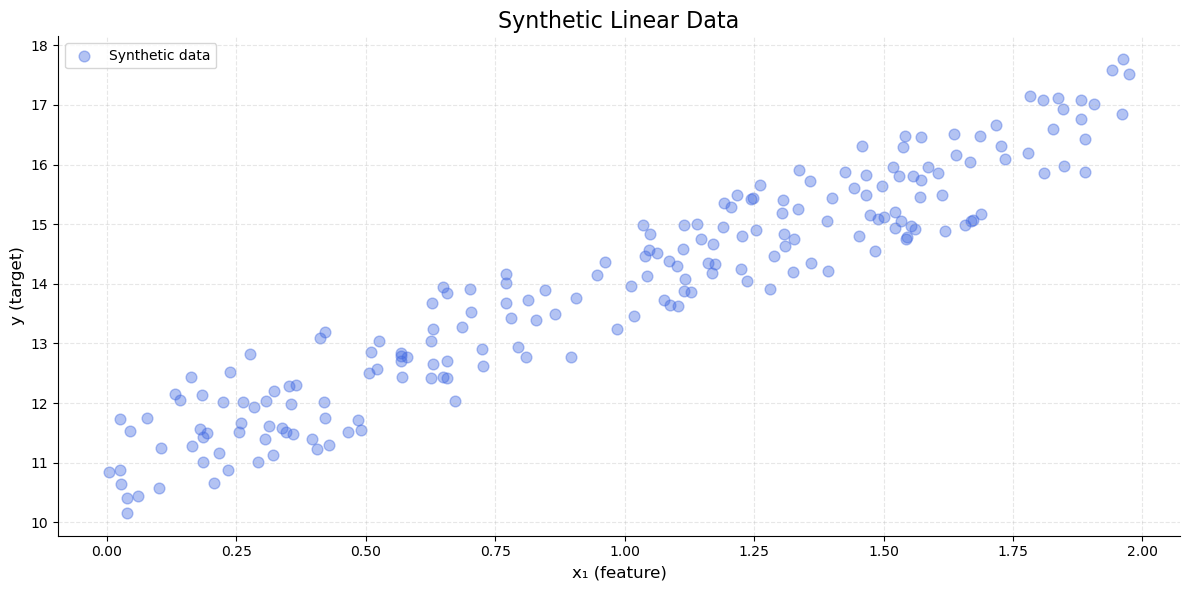

In [5]:
# 📊 Visualise the generated synthetic data
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(X, y, color='royalblue', s=60, alpha=0.4, label="Synthetic data")

ax.set_title("Synthetic Linear Data", fontsize=16)
ax.set_xlabel("x₁ (feature)", fontsize=12)
ax.set_ylabel("y (target)", fontsize=12)
ax.legend()

# Optional: turn off top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


## 🧮 Normal Equation vs. `sklearn` Linear Regression

There are two common ways to solve a linear regression problem:

1. **Normal Equation** (Analytical method):  
   This method uses a direct mathematical formula to calculate the best-fitting line:  
   $$
   \theta = (X^T X)^{-1} X^T y
   $$
   It’s simple and doesn’t require tuning hyperparameters like learning rate, but it can be computationally expensive when the number of features is large (since it involves inverting a matrix).

2. **Using `sklearn.linear_model.LinearRegression`**:  
   This is the most practical and efficient approach for real-world problems. Scikit-learn handles all the computations under the hood, including fitting intercepts and working with multiple features. It's optimised for performance and widely used in production and research.

Let’s compare both methods using our synthetic dataset.


In [6]:
# 👨‍🏫 Solve linear regression using the Normal Equation
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # add bias term (column of 1s)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

print(f"Theta (Normal Equation): {theta_best.ravel()}")

# 📐 Predict using the learned parameters
X_new = np.linspace(X.min(), X.max(), 100).reshape(100, 1)
X_new_b = np.c_[np.ones((100, 1)), X_new]
y_pred_normal = X_new_b @ theta_best

Theta (Normal Equation): [10.90355998  3.0730369 ]


In [7]:
# 🤖 Solve linear regression using scikit-learn
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_sklearn = lin_reg.predict(X_new)

print(f"Theta (sklearn): Intercept = {lin_reg.intercept_[0]:.2f}, Slope = {lin_reg.coef_[0][0]:.2f}")


Theta (sklearn): Intercept = 10.90, Slope = 3.07


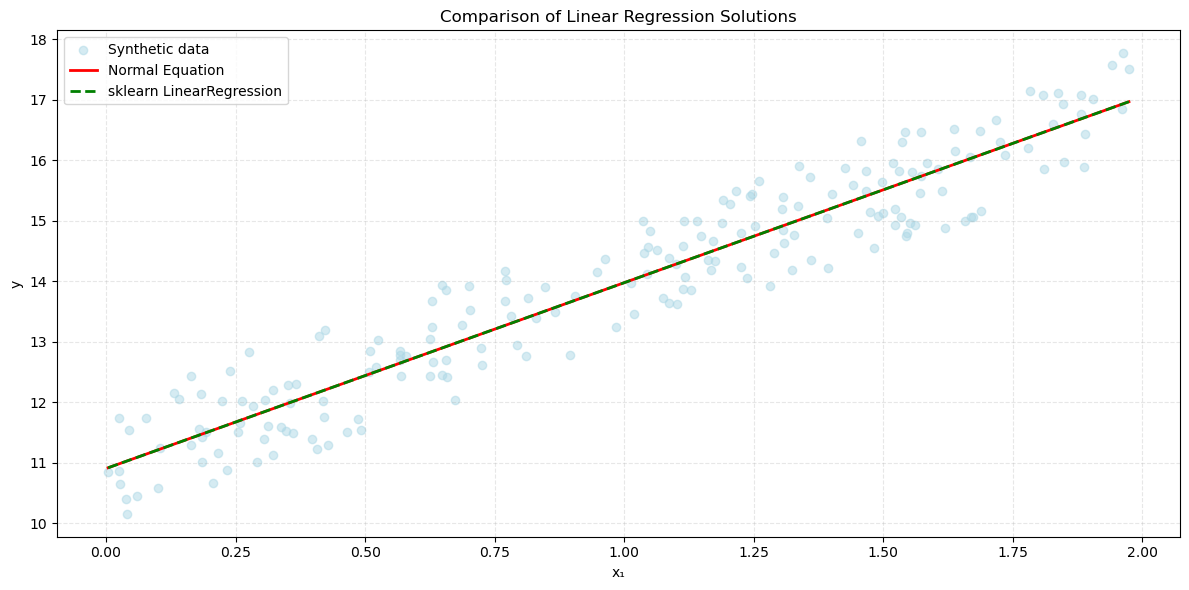

In [8]:
# 📊 Plot both fitted lines with the original data
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='lightblue', label="Synthetic data", alpha=0.5)

plt.plot(X_new, y_pred_normal, label="Normal Equation", color='red', linewidth=2)
plt.plot(X_new, y_pred_sklearn, label="sklearn LinearRegression", color='green', linestyle='--', linewidth=2)

plt.title("Comparison of Linear Regression Solutions")
plt.xlabel("x₁")
plt.ylabel("y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


### 🧾 Summary: Two Ways to Solve Linear Regression

In this section, we explored two common approaches to solving linear regression:

- **Normal Equation** provides an exact mathematical solution using matrix operations:  
  $$
  \theta = (X^T X)^{-1} X^T y
  $$
  It’s easy to implement and doesn't require tuning parameters like the learning rate. However, it becomes inefficient and even unusable when dealing with large datasets or many features, because it involves computing the inverse of a matrix — a costly operation with complexity around $O(n^3)$. It also struggles with data where the matrix is not invertible or is poorly conditioned.

- **`sklearn.linear_model.LinearRegression`** is a widely used and optimised method that handles fitting under the hood. It works well for both small and large datasets and is often the go-to choice in practice due to its simplicity and performance.

Both methods produced very similar results on our synthetic dataset, showing they are functionally equivalent for small problems. However, in modern machine learning workflows, we rarely use the Normal Equation because:
- We often have many features (high-dimensional data)
- Matrix inversion is slow and memory-heavy
- Iterative methods are more flexible and scalable

This is where **Gradient Descent** comes in — a powerful optimisation algorithm that can handle large and complex problems without relying on matrix inversion. In the next section, we'll dive into how Gradient Descent works and how we can use it to learn the parameters of a linear model.


## Components of Linear Regrssion

### 🧩 Understanding the Components: $x$, $\theta$, and $h_\theta(x)$

Before we dive into the cost function, let’s define the key components used in linear regression.

**Input features**  
Each training example is represented as a vector:

$$
x^{(i)} = [1,\ x_1^{(i)},\ x_2^{(i)},\ \dots,\ x_n^{(i)}]
$$

The leading 1 is added to account for the bias term $\theta_0$.

**Parameters (weights)**  
These are the coefficients the model learns:

$$
\theta = [\theta_0,\ \theta_1,\ \dots,\ \theta_n]
$$

**Hypothesis function**  
This is the linear function our model uses to make predictions:

$$
h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n
$$

Or more compactly, using vector notation:

$$
h_\theta(x) = \theta^T x
$$

The goal of training is to find the best $\theta$ so that $h_\theta(x) \) is as close as possible to the actual output \( y \).


### 🎯 Cost Function: Measuring How Well the Model Fits

To evaluate the performance of our model, we use a **cost function** that measures the error between predicted and actual values.

The most common cost function for linear regression is **Mean Squared Error (MSE)**:

$$
MSE = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2
$$

To simplify gradient descent calculations, we use a modified version:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2
$$

This version makes the derivative cleaner, as the 2 cancels out:

- It ensures all errors are non-negative.
- It penalises large errors more heavily.
- It creates a **convex** shape, which guarantees a single global minimum when optimising.

The gradient (used in gradient descent) is:

$$
\nabla_\theta J(\theta) = \frac{1}{m} X^T (X\theta - y)
$$

By minimising the cost function, we can find the best parameters $\theta$ for our model.


The best description by Andrew Ng is here: https://www.youtube.com/watch?v=F6GSRDoB-Cg&t=369s

### 🔍 Understanding `y_hat` and `y`

In linear regression, we use the hypothesis function to make predictions:

This is often written as:

$$
\hat{y} = h_\theta(x) 
$$

In code, we refer to this predicted value as `y_hat` — it represents what the model thinks the output should be, given the input features and current weights.

Throughout this notebook:
- $\hat{y}$ or `y_hat` = model prediction
- $y$ = actual value from the dataset

In our linear regression implementation, two key terms appear frequently:

- **`y_hat` (predicted values)**  
  This represents the values predicted by our model using the current parameters $\theta$. It is calculated as:
  $$
  \hat{y} = X \cdot \theta
  $$

- **`y` (true values)**  
  These are the actual target values from the dataset — the values we want our model to predict. The difference between `y_hat` and `y` tells us how accurate the model is.

The goal of training is to make `y_hat` as close as possible to `y` by updating the values in $\theta$.


In [12]:
# 📉 Mean Squared Error Cost Function
def mse_cost(X, theta, y):
    """
    Computes the Mean Squared Error cost function:
    J(theta) = (1 / 2m) * sum((X*theta - y)^2)
    """
    m = len(y)
    y_hat = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((y_hat - y) ** 2)
    return cost

# 🔁 Gradient of the Cost Function (vectorised)
def mse_gradient(X, theta, y):
    """
    Computes the gradient (partial derivatives) of the MSE cost function
    """
    m = len(y)
    return (1 / m) * X.T.dot(X.dot(theta) - y)

# Example usage:
# Add bias column to X
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Initialise theta randomly
theta = np.random.randn(X_b.shape[1], 1)

# Compute cost and gradient
print("MSE Cost:", mse_cost(X_b, theta, y))
print("Gradient:", mse_gradient(X_b, theta, y))


MSE Cost: 119.62519231387145
Gradient: [[-15.31053338]
 [-16.28197762]]


### 🔽 Gradient Descent: Learning by Minimising Error

To train our linear regression model, we need to find the best values for the weights $\theta$ that minimise the cost function. One popular optimisation method is **Gradient Descent**.

Imagine starting at a random point on the cost function curve (or surface). Gradient descent works by calculating the **slope (gradient)** of the cost function at that point and moving in the **opposite direction** — downhill — to reduce the error.

At each step, the parameters $\theta$ are updated using:

$$
\theta := \theta - \alpha \cdot \nabla_\theta J(\theta)
$$

Where:
- $\alpha$ is the **learning rate** — a small positive number that controls how big each step is.
- $\nabla_\theta J(\theta)$ is the gradient of the cost function with respect to $\theta$.

This process is repeated until the change in the cost function is very small (i.e., the gradient is close to zero), indicating that we have reached or are near a minimum.

> Note: The bias term $\theta_0$ is treated just like any other weight. To simplify computation, we include it as a weight for a feature $x_0 = 1$, and handle all weights together as a vector.


Initial X sample: [[1.         1.63641098]
 [1.         1.30679211]]
Initial theta: [0.246335   0.24082353]
Iteration 0: Cost = 91.4631
Iteration 1000: Cost = 3.5011
Iteration 2000: Cost = 1.7520
Iteration 3000: Cost = 1.3295
Iteration 4000: Cost = 1.0276
Iteration 5000: Cost = 0.8034
Iteration 6000: Cost = 0.6368
Iteration 7000: Cost = 0.5130
Iteration 8000: Cost = 0.4210
Iteration 9000: Cost = 0.3527
10000 iterations completed


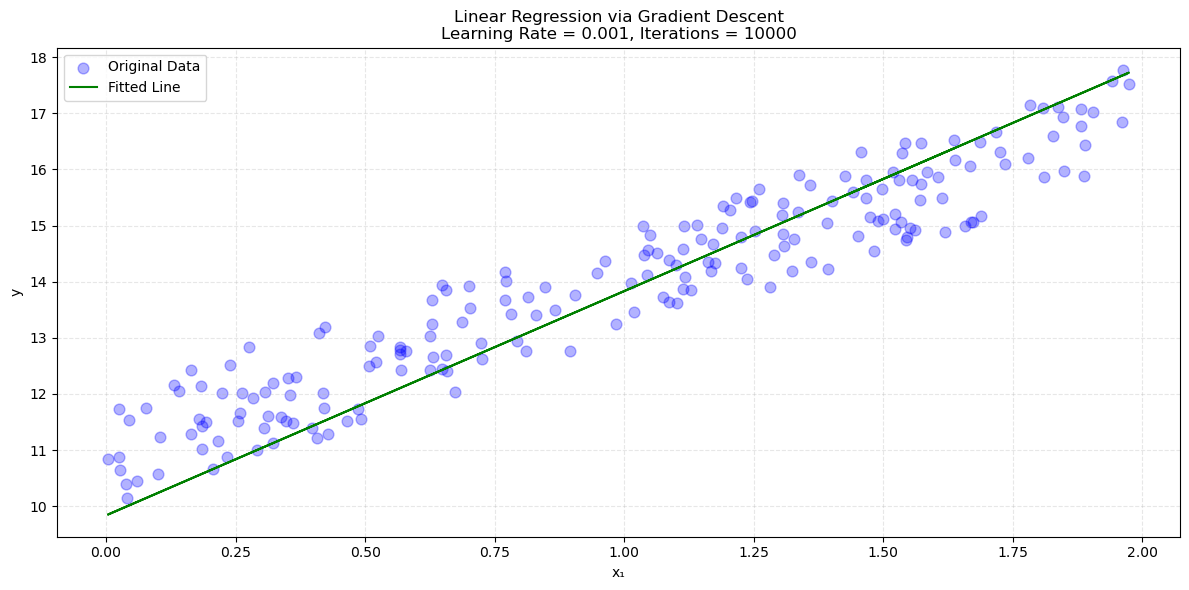

In [13]:
# Add bias column to X
X_with_bias = np.c_[np.ones(len(X)), X]

# Random initial weights: 2 values (bias and slope)
theta_init = np.random.rand(2, 1)

print("Initial X sample:", X_with_bias[:2])
print("Initial theta:", theta_init.ravel())

# ⛏ Gradient Descent Function
def gradient_descent(learn_rate, n_iter, X, theta, y):    
    cost_history = []
    
    for i in range(n_iter):                   
        gradients = mse_gradient(X, theta, y)
        theta = theta - learn_rate * gradients
        cost = mse_cost(X, theta, y)
        cost_history.append(cost)
        
        if i % 1000 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")
    
    print(f"{n_iter} iterations completed")
    return theta, cost_history

# 🔧 Set learning rate and iteration count
learning_rate = 0.001
iterations = 10000

# 🧠 Run gradient descent
final_theta, cost_history = gradient_descent(learning_rate, iterations, X_with_bias, theta_init, y)

# 📈 Make predictions using final weights
y_pred = X_with_bias @ final_theta

# 📊 Plot results
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(X, y, c='blue', s=60, alpha=0.3, label="Original Data")
ax.plot(X, y_pred, color='green', label="Fitted Line")
ax.set_title(f"Linear Regression via Gradient Descent\nLearning Rate = {learning_rate}, Iterations = {iterations}")
ax.set_xlabel("x₁")
ax.set_ylabel("y")
ax.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


### ⚙️ Using `sklearn.linear_model.LinearRegression`

Instead of implementing linear regression from scratch, we can use the built-in `LinearRegression` class from **scikit-learn**, which provides a fast and easy way to fit a linear model.

This method:
- Handles the bias (intercept) automatically.
- Uses efficient numerical methods internally.
- Requires minimal code and works well for most practical applications.

Once the model is trained, we can use it to make predictions and compare the fitted line to our original data.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Intercept (bias): 10.9036
Slope: 3.0730


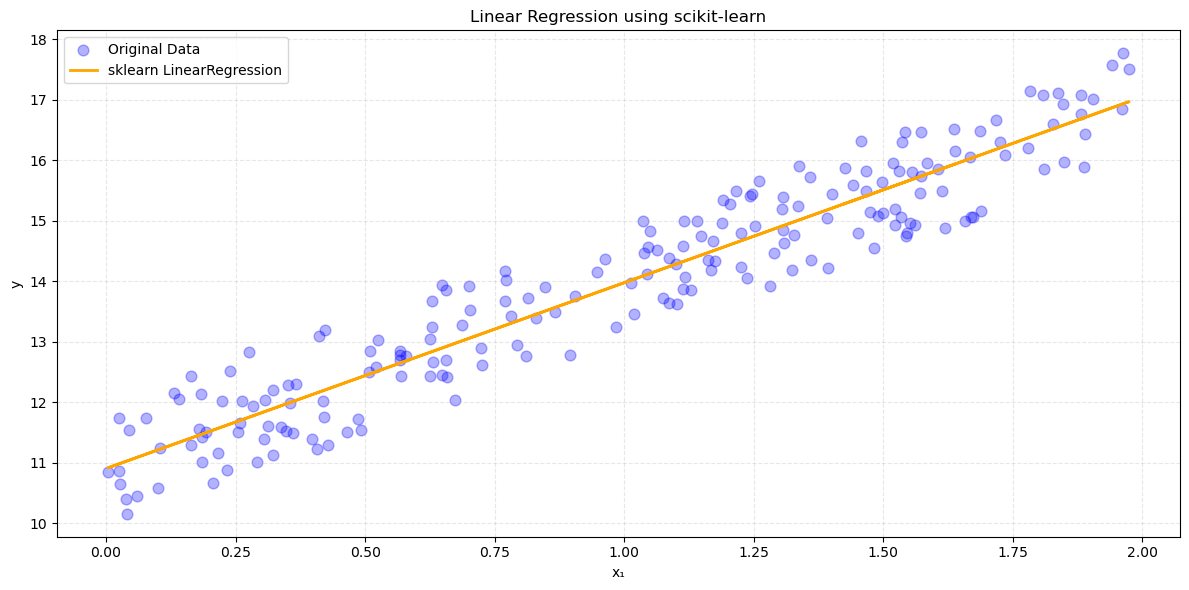

In [14]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression()
model.fit(X, y)  # Note: No need to manually add bias column — scikit-learn does it for you

# Display learned parameters
print(f"Intercept (bias): {model.intercept_[0]:.4f}")
print(f"Slope: {model.coef_[0][0]:.4f}")

# Predict values using the trained model
y_pred_sklearn = model.predict(X)

# Plot the fitted line
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(X, y, c='blue', s=60, alpha=0.3, label="Original Data")
ax.plot(X, y_pred_sklearn, color='orange', linewidth=2, label="sklearn LinearRegression")
ax.set_title("Linear Regression using scikit-learn")
ax.set_xlabel("x₁")
ax.set_ylabel("y")
ax.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## Learning Rate

Plot Training / Validation *MRSE* vs training set size 

In [78]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth = 2, label = 'train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth = 2, label = 'val')
    #return train_errors, val_errors
    

When training instances are 1 or 2 points, error will be 0, but generalise very poorly therefore high error, as training increases, the error in training will go up until it plateaus.The validation set may go done. However, due to the polynomial nature of the data, the error remains high. This indicate model is underfitting

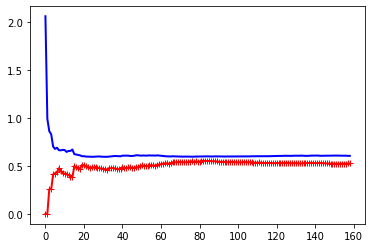

In [79]:
lin_reg = LinearRegression()
#X, y = generate_random_data()
plot_learning_curves(lin_reg, X, y)

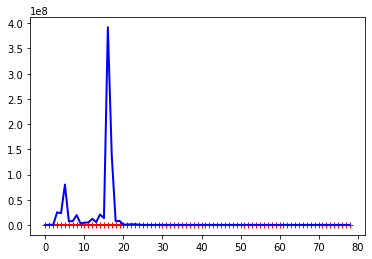

In [17]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
                            ('poly_features', PolynomialFeatures(degree = 20, include_bias=False)),
                            ('lin_reg', LinearRegression())
                        ])

plot_learning_curves(polynomial_regression, X, y)

## Bias / Variance / Irreducible Error

### Bias
This part of the generalisation error is due to wrong assumptions, such as assuming that data is linear when it is actually quandratic. A high-bias model is most like to underfit the training data.

### Variance
This part is due to the model's excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance, and thus to overfit the training data. 

### Irreducible Error
This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up data.

Bias and Variance is always a trade off between model complexity (more complex less bias more variance.)

## Regularisation

### Ridge Regression
Ridge Regrssion (Tikhnov regularisation) is a regularised version of linear regression. Forces model not only fit but keep the weights as small as possible.

Sum of all weight^2 with a hyper parameter (alpha which controlls how much regularisation is applied. if 0 then typical linear regression).

#### Cost function
j(theta) = MSE(theta) + alpha * 1/2 * sum(theta^2)

sum(theta^2) = l2 norm


### Lasso Regrssion
Least absolute shrinkage and selection operator regression, using l1 norm instead of l2 norm

#### Cost function
j(theta) = MSE(theta) + alpha * sum(abs(theta))


### Elastic Net
j(theta) = MSE(theta) + r*alpha* sum(abs(theta)) + (1-r)/2 * alpha * sum(theta^2)

Note that ridge regression is a useful technique if as it automatically reduce features, however if there are features of importance it would be better to use Lasso or Elastic Net

## Early Stopping

Basically check when validation error is minimal and not decreasing anymore.

In [45]:
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

poly_scaler = Pipeline([
    ("PolynomialFeatures", PolynomialFeatures(degree = 2, include_bias = True)),
    ("StandardScaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)


sgd_reg = SGDRegressor(n_iter_no_change = 1, warm_start = True, penalty = None, learning_rate = "constant", eta0 = 0.0005)

min_val_error = float("inf")

best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < min_val_error:
        min_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)



In [46]:
print(best_epoch)
print(sgd_reg.coef_, sgd_reg.intercept_)

802
[0.         1.54304565 1.35021219] [3.59649334]


In [50]:
X_train[0]


array([-0.68582861])

In [49]:
X_train_poly_scaled[0]

array([ 0.        , -0.29084314, -0.78422066])